In [55]:
# Importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode, kurtosis, skew

In [2]:
# Bring in Data set
adult = pd.read_csv('Clean_Data.csv')

adult.columns


Index(['SRVY_YR', 'URBRRL', 'REGION', 'AGEP_A', 'SEX_A', 'HISP_A',
       'RACEALLP_A', 'MLTFAMFLG_A', 'PHSTAT_A', 'HYPEV_A', 'CHLEV_A',
       'ANGEV_A', 'MIEV_A', 'STREV_A', 'ASEV_A', 'NUMCAN_A', 'HEIGHTTC_A',
       'WEIGHTLBTC_A', 'BMICAT_A', 'DISAB3_A', 'NOTCOV_A', 'PAYWORRY_A',
       'URGNT12MTC_A', 'EMERG12MTC_A', 'ANXLEVEL_A', 'DEPLEVEL_A',
       'SMKCIGST_A', 'SMKECIGST_A', 'LEGMSTAT_A', 'PARSTAT_A', 'CITZNSTP_A',
       'SCHCURENR_A', 'POVRATTC_A', 'FSNAP12M_A', 'FDSCAT4_A', 'HOUTENURE_A',
       'CHDEV_A', 'DIA_STATUS'],
      dtype='object')

In [3]:
# Continuous chart
# Corrleation Matrix
# DIA_status, region -Tom
# depression, anxiety, age, dia - Tom
# Race, poverty ratio, Dia - Tom
# food stamp, food security, race, dia - Tom

# Discrete Chart
# Chol, bmi, dia - Mark
# heatlh insurance, physical health, dia - mark
# High blood, low income, dia - mark
# Disability status, general heatlh, dia - mark

In [56]:
# Extract the continuous variables from the DataFrame
continuous_vars = ['AGEP_A', 'NUMCAN_A', 'HEIGHTTC_A', 'WEIGHTLBTC_A', 'POVRATTC_A']

# Calculate summary statistics
summary_stats = pd.DataFrame({
    'Mean': adult[continuous_vars].mean(),
    'Median': adult[continuous_vars].median(),
    'Max': adult[continuous_vars].max(),
    'Min': adult[continuous_vars].min(),
    'Spread': adult[continuous_vars].max() - adult[continuous_vars].min(),
    'Kurtosis': [kurtosis(adult[var]) for var in continuous_vars],
    'Skewness': [skew(adult[var]) for var in continuous_vars]
}, index=continuous_vars)

# Print the summary statistics table
print(summary_stats)

                    Mean  Median    Max    Min  Spread   Kurtosis  Skewness
AGEP_A         52.976420   54.00   99.0   18.0    81.0  -1.056787 -0.047634
NUMCAN_A        0.154559    0.00    4.0    0.0     4.0  12.601091  3.252797
HEIGHTTC_A     68.639196   67.00   96.0   59.0    37.0   5.709118  2.350049
WEIGHTLBTC_A  228.263423  176.00  996.0  100.0   896.0  10.103533  3.399739
POVRATTC_A      4.346493    3.67   11.0    0.0    11.0  -0.323040  0.786484


C:\Users\thoma\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


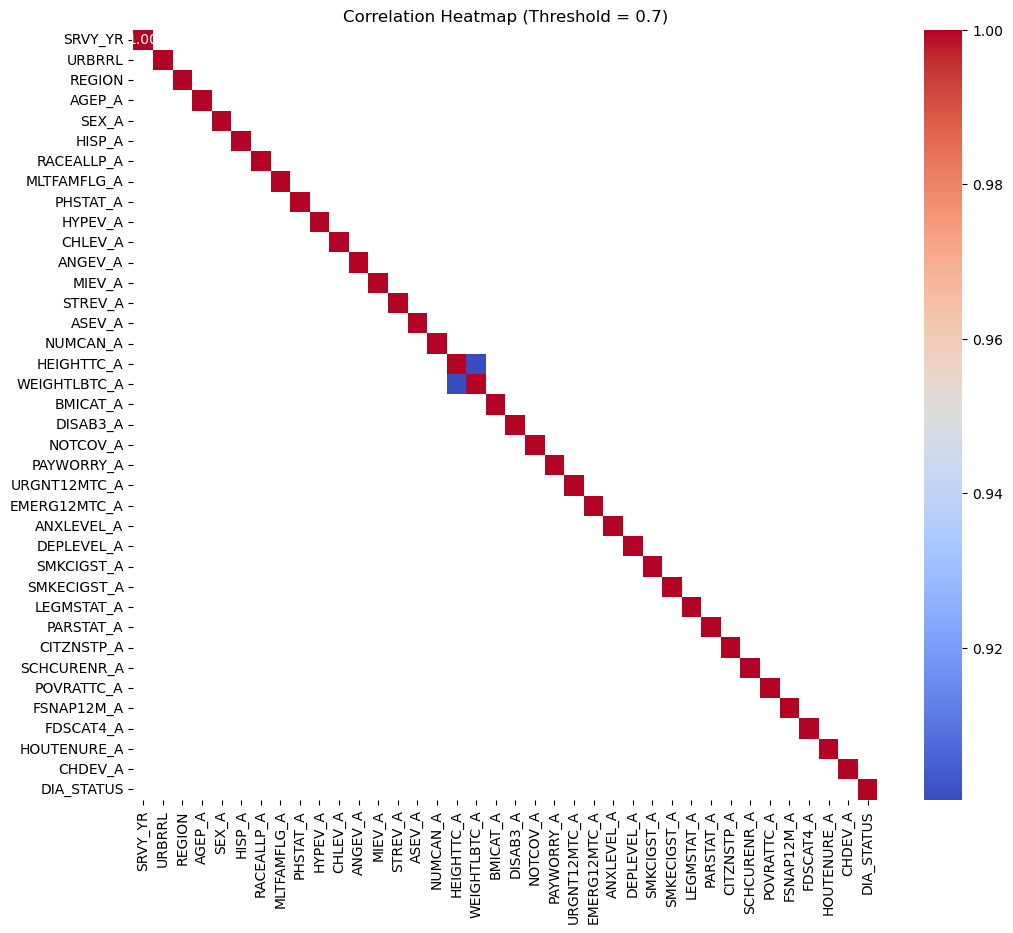

In [4]:
corr_matrix = adult.corr()

threshold = 0.7

# Filter correlations below threshold
high_corr = corr_matrix[abs(corr_matrix) > threshold]

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Threshold = 0.7)')
plt.show()

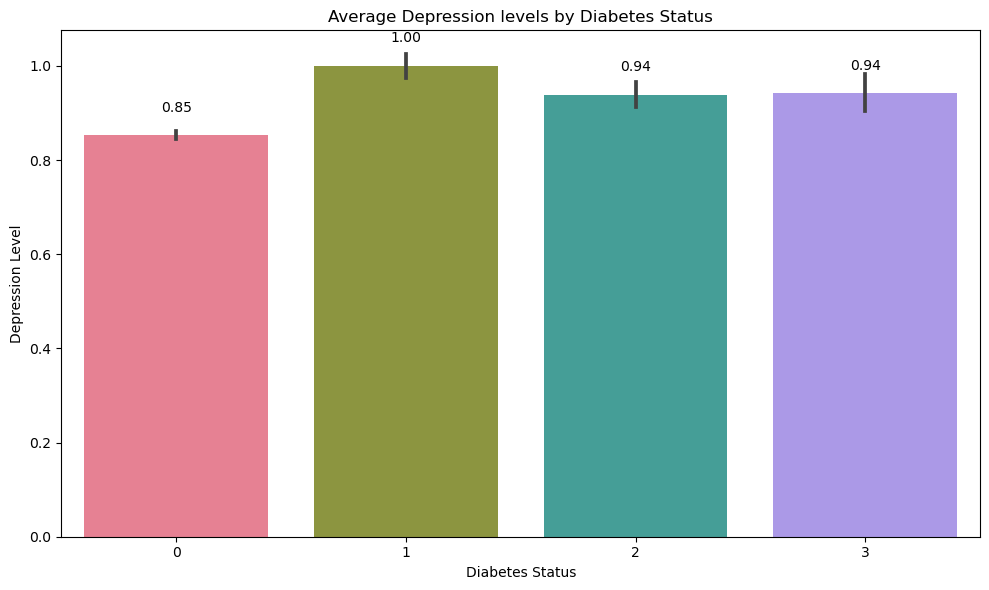

In [37]:
# Average Depression levels by Diabetes Status

plt.figure(figsize=(10, 6))

# Calculate average depression levels by diabetes status
average_depression_by_status = adult.groupby('DIA_STATUS')['DEPLEVEL_A'].mean()

# Create the bar plot
ax = sns.barplot(data=adult, x='DIA_STATUS', y='DEPLEVEL_A', palette='husl')

# Add title and labels
plt.title('Average Depression levels by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Depression Level')

# Add average depression levels on top of bars
for i, val in enumerate(average_depression_by_status):
    ax.text(i, val + 0.05, f'{val:.2f}', ha='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()

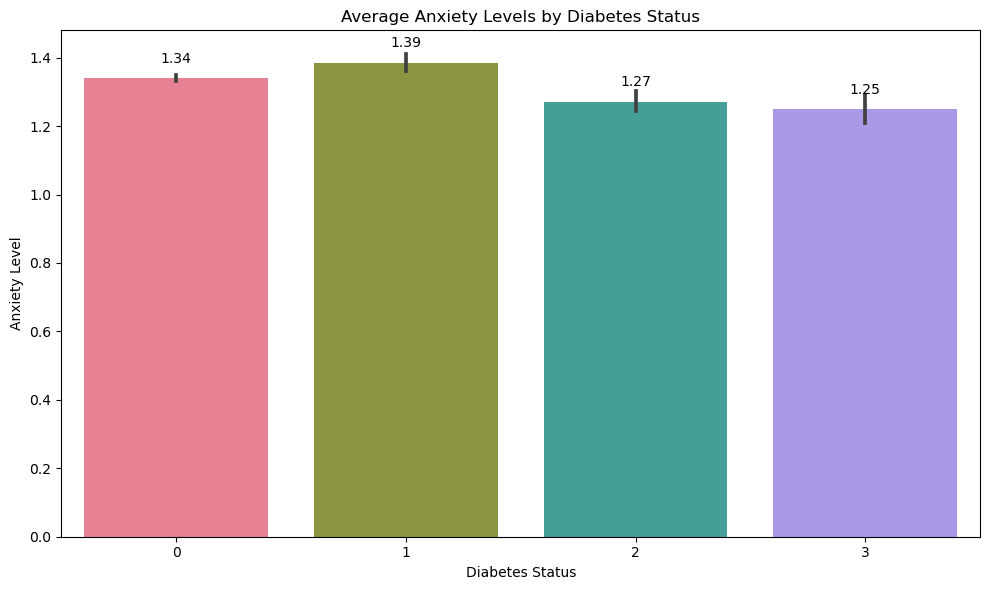

In [36]:
# Average Anxiety Levels by Diabetes Status

plt.figure(figsize=(10, 6))

# Create the bar plot
ax = sns.barplot(data=adult, x='DIA_STATUS', y='ANXLEVEL_A', palette='husl')

# Add title and labels
plt.title('Average Anxiety Levels by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Anxiety Level')

# Add numbers on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 14),
                textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\thoma\AppData\Local\Temp\ipykernel_200180\3869356102.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x='POVRATTC_A', ax=axes[i], element='step', kde=True, palette='husl')
C:\Users\thoma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thoma\AppData\Local\Temp\ipykernel_200180\3869356102.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x='POVRATTC_A', ax=axes[i], element='step', kde=True, palette='husl')
C:\Users\thoma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

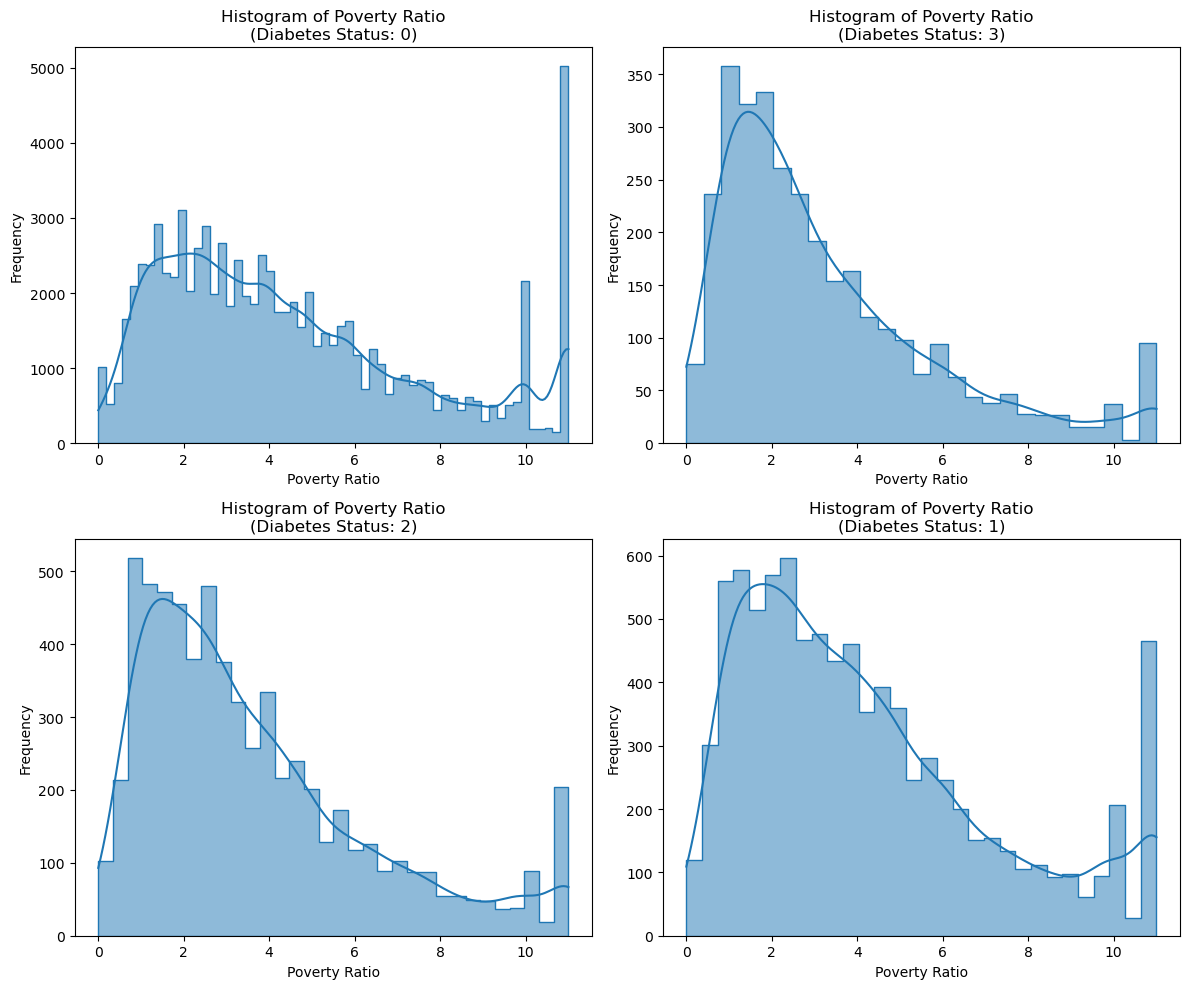

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create a histogram for each diabetes status
for i, status in enumerate(adult['DIA_STATUS'].unique()):
    # Filter data for the current diabetes status
    data = adult[adult['DIA_STATUS'] == status]
    
    # Create the histogram
    sns.histplot(data=data, x='POVRATTC_A', ax=axes[i], element='step', kde=True, palette='husl')
    
    # Add title and labels
    axes[i].set_title(f'Histogram of Poverty Ratio\n(Diabetes Status: {status})')
    axes[i].set_xlabel('Poverty Ratio')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\thoma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thoma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


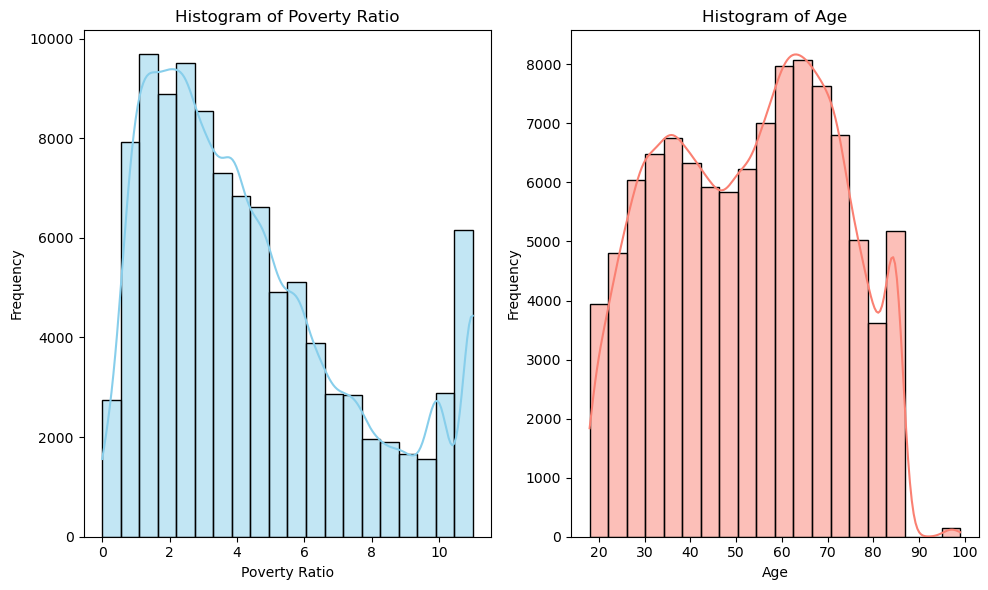

In [66]:
plt.figure(figsize=(10, 6))

# Create the histogram for poverty ratio
plt.subplot(1, 2, 1)
sns.histplot(data=adult, x='POVRATTC_A', bins=20, kde=True, color='skyblue')
plt.title('Histogram of Poverty Ratio')
plt.xlabel('Poverty Ratio')
plt.ylabel('Frequency')

# Create the histogram for age
plt.subplot(1, 2, 2)
sns.histplot(data=adult, x='AGEP_A', bins=20, kde=True, color='salmon')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\thoma\AppData\Local\Temp\ipykernel_200180\205366632.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=adult, x='AGEP_A', y='AGEP_A', palette='husl')


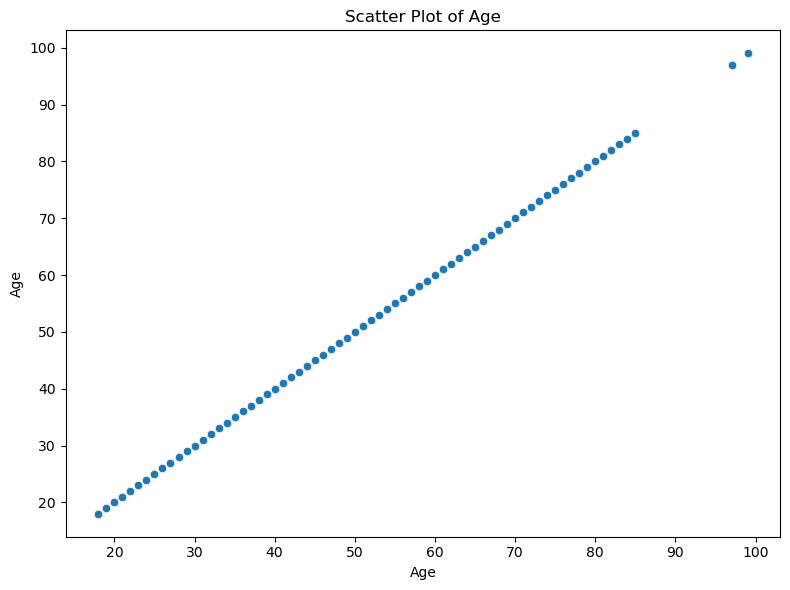

In [73]:
# Set up the figure
plt.figure(figsize=(8, 6))

# Create the scatter plot for age
sns.scatterplot(data=adult, x='AGEP_A', y='AGEP_A', palette='husl')

# Add title and labels
plt.title('Scatter Plot of Age')
plt.xlabel('Age')
plt.ylabel('Age')

# Show the plot
plt.tight_layout()
plt.show()